# Programming for Data Science and Artificial Intelligence

## 6.3 Supervised Learning - Classification - SVM

### Readings: 
- [GERON] Ch3, 5
- [VANDER] Ch5
- [HASTIE] Ch12
- Step-by-step tutorials - https://www.svm-tutorial.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Support Vector Machines

SVM is a **binary classification** algorithm, often called the "widest street" algorithm to try to draw the best-fit line that maximize the margin between two classes.

Let's say we have this following data:

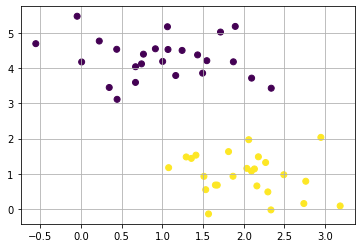

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

In simple algorithms, we can draw a line separating them like this:

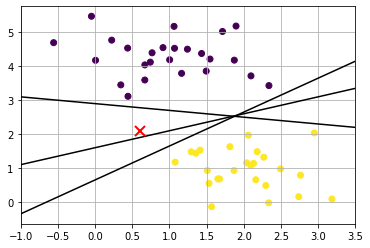

In [3]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#where should this value be classified as?
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

You can probably already imagine the idea.  It is basically draw around each line a margin of some width, up to the nearest point of each class.  If this width is maximized for a particular line, that line should probably be the best.

(-1.0, 3.5)

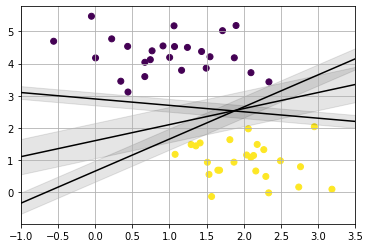

In [4]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d,
                     color='black', alpha=0.1)

plt.xlim(-1, 3.5)

### Mathematical Details

#### Notations

Scalars are denoted with italic lowercases (e.g., $y$, $b$), vectors with bold lowercases (e.g., $\mathbf{w},\, \mathbf{x}$), and matrices with italic uppercases (e.g., $W$). $\mathbf{w^T}$ is the transpose of $\mathbf{w}$
and $\|\mathbf{w}\| = \mathbf{w}^T\mathbf{w}$

Let:

- $\mathbf{x}$ be a feature vector (i.e., the input of the SVM). $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the dimension of the feature vector. 
- $y$ be the class (i.e., the output of the SVM). $y \in \{ -1,1\}$, i.e. the classification task is binary.
- $\mathbf{w}$ and $b$ be the parameters of the SVM: we need to learn them using the training set.
- $(\mathbf{x}^{(i)}, y^{(i)})$ be the $𝑖$th sample in the dataset. Let's assume we have $m$ samples in the training set.

With n = 2, one can represent the SVM's decision boundaries as follows:

<img src = "../../Figures/svm.png" width="300" >

The hypothesis function is simply:

$$h = \text{sign}(\mathbf{w^T}\mathbf{x}^{(i)}+b)$$

The constraint is as follows:

$$
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

If we multiply $y$ on both equations, the constraint function can then be more concisely written as 

$$y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1$$

#### Goal

The SVM aims at satisfying two requirements:

1. The SVM should maximize the distance between the two decision boundaries. Mathematically, this means we want to maximize the distance between the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = -1$ and the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = 1$.  This distance is equal to $\frac{2}{\|\mathbf{w}\|}$.  This means we want to solve $\underset{\mathbf{w}}{\operatorname{max}} \frac{2}{\|\mathbf{w}\|}$.  Equivalently we want $\underset{\mathbf{w}}{\operatorname{min}} \frac{\|\mathbf{w}\|}{2}$

2. The SVM should also correctly classify all $\mathbf{x}^{(i)}$, which means 

$$y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1, \forall i \in \{1,\dots,m\}$$


#### Primal Problem

Recall that our primal, optimization problem is of the form:

$$
\begin{aligned}
	\min_{w, b} f(w,b) &= \min_{w, b}  \  \frac{1}{2} ||w||^2
	\\
	s.t. \ \  g_i(w,b) &= - (y^{(i)} (w^T x^{(i)} + b) - 1) \leq 0 
\end{aligned}
$$

#### Lagrange Method

The method of Lagrange multipliers allows us to turn a constrained optimization problem into an unconstrained one of the form.

$$\mathcal{L} = f(w) + \sum \alpha \cdot g(w) + \sum \beta \cdot h(w)$$ 

where $f(w)$ is the function we want to minimize, and $g_i(w)$ and $h_i(w)$ is the constraint function where $g_i(w) \leq 0$ and $h_i(w) = 0$.  To solve this function, we set the partial derivative of our parameters to 0.

We can write our equation as 

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha^{(i)} [y^{(i)} (w^T x^{(i)} + b) - 1]$$

Where $\mathcal{L}(w, b, \alpha)$ is called the Lagrangian and $\alpha_i$ are called the Lagrangian multipliers.

Our primal optimization problem with the Lagrangian becomes the following:

$$\min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right)$$

#### Dual Problem

This is the idea of turning primal problem into dual problem by acknowledging that this is roughly the same:

$$\min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right) =   \max_\alpha \left( \min_{w,b} \mathcal{L}(w, b, \alpha)\right)$$

#### Why Dual, not Primal?

Short answer: Faster computation + allows to use the kernel trick.

#### Duality and KTT

Karush Kuhn Tucker (KTT) conditions allow us to solve the dual problem instead of the primal one, while ensuring that the optimal solution is the same. In our case the conditions are the following:

- The primal objective and inequality constraint functions must be convex
- The equality constraint function must be affine
- The constraints must be strictly feasible

Then there exists $w^*$, $\alpha^*$ which are solutions to the primal and dual problems. Moreover, the parameters $w^*$, $\alpha^*$ satisfy the KTT conditions below:

$$
\begin{aligned}
	&\frac{\partial}{\partial w_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(A)
	\\
	&\frac{\partial}{\partial \beta_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(B)
	\\
	&\alpha_i^* g_i(w^*) = 0 & (C)
	\\
	&g_i(w^*) \leq 0  & (D)
	\\
	&\alpha_i^* \geq 0 & (E)
\end{aligned}
$$

Moreover, if some $w^*$, $\alpha^*$ satisfy the KTT solutions then they are also solution to the primal and dual problem.

Note that when $g_i(w^*) < 0$ (samples that are not in the gutter), to maximize, $\alpha$ must be 0, in order to satisfy $C$.  (Note that our equation uses minus sign instead of plus sign, but the result is the same.).  This means that any samples having $\alpha=0$ is not support vectors. On the other hand, when $g_(w^*) = 0$ (samples that are in the gutter), to maximize, $\alpha$ can or cannot be 0 to satisfy $C$, that is, we can choose whether to choose that sample to be our support vector.  Any samples with $\alpha>0$ is support vector.

#### Back to the Dual Problem

Now that you are convinced dual problem is worth solving more than primal problem.  To solve dual problem, we take the partial derivatives of $\mathcal{L}(w, b, \alpha)$ with respect to $w$ and $b$, equate to zero (according to KKT conditions) and then plug the results back into the original equation of the Lagrangian

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1]$$

$$\frac{\partial \mathcal{L}}{\partial {\mathbf w} }= {\mathbf w} - \sum \alpha_i \; y^{(i)} \; \mathbf x^{(i)} = 0$$

$${\mathbf w} = \sum \alpha_i \; y^{(i)} \; \mathbf x^{(i)}\tag{6}$$

$$\frac{\partial \mathcal{L}}{\partial b}=-\sum \alpha_i y^{(i)} = 0,$$

$$\sum \alpha_i \, y^{(i)} = 0\tag{7}$$

Plugging the $w$ back to the original equation, as well as the fact that $\sum \alpha_i y^{(i)} = 0,$, we got that 

$$\mathcal{L}(w, b, \alpha) = \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> $$

hence generating an equivalent dual optimization problem of the form

$$
\begin{aligned}
	&\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> 
	\\
	& s.t. \ \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
$$

#### What's next

To max $\alpha$ according to the equation, we cannot use gradient since the equation is neither concave nor convex.  But notice the quadratic form of the equation.  To optimize such equation, we can use **quadratic programming**.  Later in the course, we shall discuss using **CVXOPT** python library.  Solving the equation gives us back $\alpha$, which using the $\alpha$, we can get $w$, and using $w$, we can then get $b$.  Hooray, we got our hypothesis function $\mathbf{w^T}\mathbf{x}^{(i)}+b$

We shall also discuss other minor improvements to the SVM.  Namely two - 1) **Soft margin**, 2) **Kernels**.

#### Hard margin vs. Soft margin 

What we have done so far is the **hard-margin SVM**, as this quadratic optimization problem admits a solution iff the data is linearly separable.

One can relax the constraints by introducing so-called **slack variables** $\xi^{(i)}$. Note that each sample of the training set has its own slack variable. This gives us the **soft-margin SVM** following quadratic optimization problem:

$$
\begin{aligned}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{m} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,m\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,m\} 
\end{aligned}
$$

Following the inequality constraints on the slack variables, we add a beta in front of it (following the Lagrange method).  Thus the Lagrange formulation change to:

$$
\mathcal{L}(w, b, \xi, \alpha, \beta) =   \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} \xi^{(i)} - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1 - \sum_{i=1}^{m} \beta_i \xi^{(i)}
$$

Although this looks tough, terms cancel out nicely.

Following dual form, we need to first minimize w.r.t $\mathbf{w}$, $b$, and $\xi$, before maximizing w.r.t each $\alpha_i \geq 0$ and $\beta_i \geq 0$:

$$\frac{\partial \mathcal{L}}{\partial {\mathbf w} }= {\mathbf w} - \sum \alpha_i \; y^{(i)} \; \mathbf x_i = 0$$

$${\mathbf w} = \sum \alpha_i \; y^{(i)} \; \mathbf x^{(i)}$$

$$\frac{\partial \mathcal{L}}{\partial b}=-\sum \alpha_i y^{(i)} = 0,$$

$$\sum \alpha_i \, y^{(i)} = 0$$

$$\frac{\partial \mathcal{L}}{\partial \xi}= C - \sum \alpha_i - \sum \beta_i = 0$$

Plugging these truths to the Lagrange formula, it happens that we got the same formula, with one addition, i.e., $\alpha_i \leq C$, thus

$$
\begin{aligned}
	&\max_{\alpha} \min_{w,b, \xi} \mathcal{L}(w, b, \xi, \alpha, \beta)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> 
	\\
	& s.t. \ C \geq \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
$$

#### Kernels

Recall this equation:

$${\mathbf w} = \sum \alpha_i \; y^{(i)} \; \mathbf x^{(i)}$$

Attempting to plug this back to our hypothesis function, we get

$$h = y^{(i)} (\sum \alpha_i \; y^{(i)} \; \mathbf x^{(i)}\mathbf{x^{\prime}}^{(i)}+b) \ge 1$$

Here we put $\prime$ to another $x$ to denote that these two x are different.  Make an observation that to predict anything, we simply need to find the dot product of a pair of $x$

Based on this observation, one can add even more flexibility by introducing a function $\phi$ that maps the original feature space to a higher dimensional feature space. This allows non-linear decision boundaries. 

Suppose we have a mapping $\varphi \, : \, \mathbb R^n \to \mathbb R^d$, where $d$ is of higher dimensions. Then the dot product of $\mathbf{x}$ and $\mathbf{x^{\prime}}$ in this space is $\varphi(\mathbf x)^T \varphi(\mathbf x^{\prime})$.  A kernel is a function $k$ that corresponds to this dot product without having to performing $\varphi$, i.e., 

$$k(\mathbf x, \mathbf x^{\prime}) = \varphi(\mathbf x)^T \varphi(\mathbf x^{\prime})$$

Why is this useful? or How is this different from previous transformations such as polynomial feature engineering we did on linear regression?  That is, kernels give a way to **compute dot products in some feature space without even knowing what this space is and what is $\varphi$**. Since we don't need to actually transform features, this saves a lot of computation time.

For example, consider a simple polynomial kernel of degree 2, $k(\mathbf x, \mathbf x^{\prime}) = (1 + \mathbf x^T \mathbf x^{\prime})^2$ (Note that in general polynomial kernel, 2 can be $p$) with $\mathbf x, \mathbf x^{\prime} \in \mathbb R^2$.  This doesn't seem to correspond to any mapping function $\varphi$. It's just a function that returns a real number. Assuming that $\mathbf x = (x_1, x_2)$ and $\mathbf x^{\prime} = (x^{\prime}_1, x^{\prime}_2)$, let's expand this expression:

$$
\begin{aligned}
k(\mathbf x, \mathbf x^{\prime}) &= (1 + \mathbf x^T \mathbf x^{\prime})^2 = (1 + x_1 \, x^{\prime}_1  + x_2 \, x^{\prime}_2)^2 = \\
 &= 1 + x_1^2 x^{\prime 2}_1 + x_2^2 x^{\prime 2}_2 + 2 x_1 x^{\prime}_1 + 2 x_2 x^{\prime}_2 + 2 x_1 x_2 x^{\prime}_1 x^{\prime}_2
\end{aligned}
$$

Note that this is nothing else but a dot product between two vectors of $\varphi(\mathbf x) = (1, x_1^2, x_2^2, \sqrt{2} x_1, \sqrt{2} x_2, \sqrt{2} x_1 x_2)$ and $\varphi(\mathbf x^{\prime}) = (1, x^{\prime 2}_1, x^{\prime 2}_2, \sqrt{2} x^{\prime}_1, \sqrt{2} x^{\prime}_2, \sqrt{2} x^{\prime}_1 x^{\prime}_2)$.  So the kernel $k(\mathbf x, \mathbf x^{\prime}) = (1 + \mathbf x^T \mathbf x^{\prime})^2 = \varphi(\mathbf x)^T \varphi(\mathbf x^{\prime})$ computes a dot product in 6-dimensional space without explicitly visiting this space.

Another example is Gaussian kernel:

$$k(\mathbf x, \mathbf x^{\prime}) = \exp\big(- \gamma \, \|\mathbf x - \mathbf x^{\prime}\|^2 \big)$$

Here is a short proof, ignoring $\gamma$, we can use the taylor series expansion, then we get:

$$
= \exp\big(- \, \|\mathbf x - \mathbf x^{\prime}\|^2 \big)
$$

$$
= \exp\big(- \mathbf x^2\big)\exp\big(- \mathbf x^{\prime 2}\big) \Sigma_{k=0}^\infty \frac{2^k(\mathbf{x})^k(\mathbf{x^{\prime k}})}{k!}
$$

Using kernel, our optimization problem can be revised to:

$$
\begin{aligned}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{m} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,m\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,m\} 
\end{aligned}
$$

And our lagrange formula changed only slightly to

$$
\begin{aligned}
	&\max_{\alpha} \min_{w,b, \xi} \mathcal{L}(w, b, \xi, \alpha, \beta)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j \varphi(\mathbf x^{(i)})\varphi(\mathbf x^{(j)}) 
	\\
	& s.t. \ C \geq \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
$$

#### Making a prediction
Once the $\alpha_i$ are learned, one can predict the class of a new sample with the feature vector <code>X_test</code> as follows:

$$
\begin{aligned}
\hat{y}&=\text {sign}\left(\mathbf{w^T}\phi\left(\mathbf{x}^{\text {test}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{m}\alpha_iy^{(i)}\phi\left(x^{(i)}\right)^T\phi\left(\mathbf{x}^{\text {test}}\right)+b \right)
\end{aligned}
$$

### Let's start with a simple dataset that is linearly separable

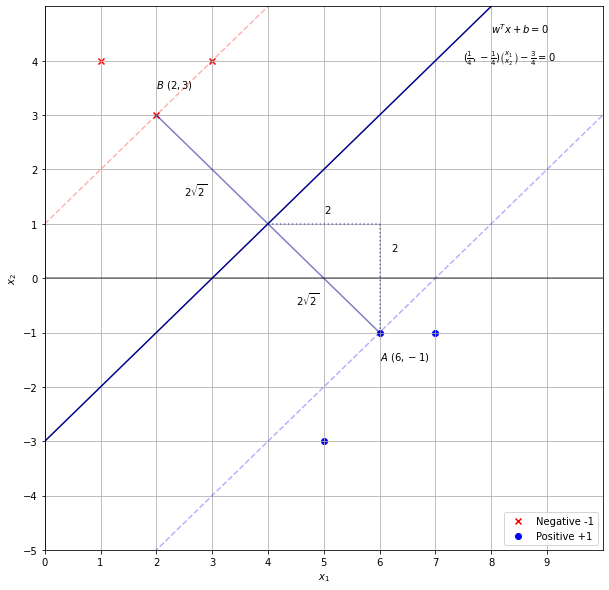

In [5]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.grid()

## 1. Scratch: SVM with Hard Margin

Since we will solve this optimization problem using the **CVXOPT** library in python, we will need to match the solver's API which, according to the documentation is of the form:

$$
\begin{aligned}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     s.t. \ & \ Gx \leq h 
    \\
    & \ Ax = b
\end{aligned}
$$

Recall that the dual problem is expressed as:

$$
\max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}>
$$

Let $\mathbf{H}$ be a matrix such that 

$$H_{ij} = y^{(i)}y^{(j)} <x^{(i)} x^{(j)}> $$

Then the optimization becomes:

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha_i \geq 0 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}
$$

We convert the sums into vector form and multiply both the objective and the constraint by −1
which turns this into a minimization problem and reverses the inequality

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
    & s.t. \ - \alpha_i \leq 0 
    \\
    & s.t. \ y^T \alpha = 0 
\end{aligned}
$$

We have that strange <code>1.T</code> just for the sake of matching with <code>CVXOPT</code> solver API.

We are now ready to convert our numpy arrays into the cvxopt format, using the same notations as in the documentation.  

- $\mathbf{P} = \mathbf{H}$ a matrix of size $(m, m)$
- $\mathbf{q} = \mathbf{-1}$ a matrix of size $(m, 1)$
- $\mathbf{G} = \mathbf{-diag[1]}$ a diagonal matrix of $-1s$ size $(m, m)$
- $\mathbf{h} = \mathbf{0}$ a vector of size $(m,1)$
- $\mathbf{A} = \mathbf{y}$ a vector of size $(m,1)$
- $\mathbf{b} = \mathbf{0}$ a scalar$


Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $\mathbf{h}$ which define the constraint are

$$
G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
h = \begin{bmatrix} 0 \\ 0  \end{bmatrix}
$$


#### Computing the matrix H in vectorized form

Consider the simple example with 2 input samples $\{x^{(1)}, x^{(2)}\} \in \mathbb{R}^2$ which are two dimensional vectors

$$
X = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \end{bmatrix} \ \ \ y = \begin{bmatrix} y^{(1)}  \\ y^{(2)} \end{bmatrix}
$$

We now proceed to create a new matrix $X'$ where each input sample x is multiplied by the corresponding output label y. This can be done easily in Numpy using vectorization and padding.

$$
X' = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix}
$$

Finally we take the **matrix multiplication** of $X'$ and its transpose giving $H = X'X'.T$

$$
H = X' @ X'^T = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix} \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(2)}_1 y^{(2)}  \\
x^{(1)}_2y^{(1)} & x^{(2)}_2y^{(2)} \end{bmatrix}
$$


In [6]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#### Compute w and b parameters

In [7]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


## 2. Scratch: SVM with Soft Margin

To make the data no longer linearly separable, we shall add a positive point in the middle of the negative cluster:

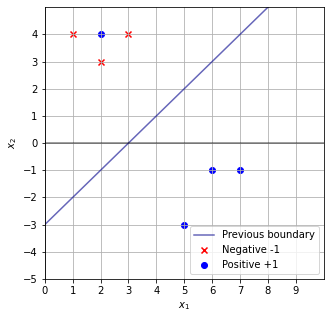

In [8]:
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))


fig = plt.figure(figsize = (5,5))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6, label = 'Previous boundary')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.grid()

#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[2,4]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1 ])

For the softmax margin SVM, the optimization problem can be slightly revised and be expressed as 

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. \ \ & 0 \leq \alpha_i \leq C 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}
$$

which can be written in standard form as

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
     s.t. & \ - \alpha_i \leq 0 
    \\
     & \alpha_i \leq C
     \\
     &\ y^T \alpha = 0  
\end{aligned}
$$

We translate this new constraint into standard form by concatenating below matrix $\mathbf{G}$ a diagonal matrix of 1s of size $(m, m)$. Similarly for the vector $\mathbf{h}$ to which the value of $\mathbf{C}$ is added $m$ times.

Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $h$ which define the constraint are:

$$
G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1\end{bmatrix}
$$

$$
h = \begin{bmatrix} 0 \\ 0 \\ C \\ C \end{bmatrix}
$$



In [9]:
#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [ 5.      6.3125  1.3125 10.    ]
w =  [ 0.25 -0.25]
b =  [-0.75]


#### Comparing to Sklearn results

In [10]:
from sklearn.svm import SVC

clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [0 2 3 6]
Support vectors =  [[ 3.  4.]
 [ 2.  3.]
 [ 6. -1.]
 [ 2.  4.]]
Number of support vectors for each class =  [2 2]
Coefficients of the support vector in the decision function =  [[ 5.      6.3125  1.3125 10.    ]]


## 3. Scratch: Implementing Kernels

Accuracy: 1.0


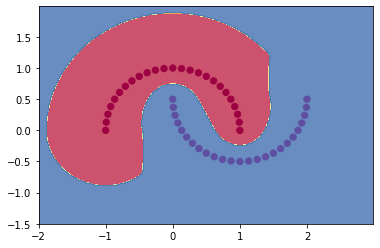

In [11]:
import cvxopt
from sklearn import datasets

#here I use z instead of xprime since I don't know how to write prime in code....
def linear(x, z):
    return np.dot(x, z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p

def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel=gaussian, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.y = y
        self.X = X
        m, n = X.shape

        # Calculate Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def predict(self, X):  #<----this is X_test
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv
    
if __name__ == "__main__":
    X, y = datasets.make_moons(50)
    
    #transform our y to be -1 and 1 to meet svm purpose
    y[y==0] = -1
    
    svm = SVM(kernel=gaussian)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    plot_contour(X, y, svm)

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

## 4. Sklearn

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

#this code will run very long time!!!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
assert X_train.shape[0] == y_train.shape[0]

#select the type of hyperplane used to separate the data
kernel = ['linear', 'rbf']

#regularized penalty
#when C is small, classifier is ok with misclassified data
#when C is large, classifier is heavily penalized for misclassified data
C_range = [1, 2]

#parameter for RBF kernel, increasing gamma
#allows for more complex decision boundary but can lead
#to overfitting
gamma_range = [0.0001, 0.0005]

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("=========Best parameters=======")
print(f"The best parameters are {grid.best_params_} with" +
          f"a score of {grid.best_score_:.2f}")

model = grid.best_estimator_

model.fit(X_train, y_train)
yhat = model.predict(X_test) #svm use this instead

#plot precision recall curve
from sklearn.metrics import average_precision_score, classification_report, confusion_matrix
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

"""
If you want better score, try larger range of params...I tried only a few so not to slow
down my computer.
"""

=========Best parameters=======
The best parameters are {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'} witha score of 0.80
=========Average precision score=======
0.875
=========Classification report=======
Report:                precision    recall  f1-score   support

          -1       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



'\nIf you want better score, try larger range of params...I tried only a few so not to slow\ndown my computer.\n'

### When to Use SVM

SVM work fantastic, given the following advantages:
- Kernel trick allows non-linearity and works well with high-dimensional data
- Supports regularization out of the box with the slack variables
- Use only few support vectors as decision boundary thus the prediction phase is very fast.  

However, SVMs have several disadvantages as well:
- For large number of training amples, the computational cost can be scary! Around $\mathcal{O}[N^3]$ at worst
- Require fine-tuning C which often takes a lot of time! 
- Does not support probability - only output the class

We usually use SVM when our Baye or Logistic fellows fail us, or we believe our data is non-linear to some extent.

### ===Task===

Your work:
- Load this dataset to numpy, with first two columns as features and last as target
- Plot the data using a scatter plot
- Perform the SVM classification using our scratch code

In [2]:
dataset = [[3.63636364e+00,1.09036800e+00,0], [4.09090909e+00,2.28173256e+00,0], [1.01010101e-01,1.31203345e+00,1], [4.54545455e-01,1.98982144e+00,1], [1.91919192e+00,1.74885201e+00,0], [1.76767677e+00,3.33230999e-01,1], [2.57575758e+00,2.97181157e+00,0], [1.06060606e+00,8.10748756e-01,1], [2.97979798e+00,1.06342392e+00,1], [1.86868687e+00,1.59906946e+00,0], [4.29292929e+00,2.79576184e+00,0], [4.39393939e+00,2.94500082e+00,0], [2.97979798e+00,2.06342392e+00,0], [2.37373737e+00,2.92235429e+00,0], [2.17171717e+00,1.51367739e+00,1], [2.67676768e+00,2.84972543e+00,0], [3.68686869e+00,1.67430145e-01,1], [5.05050505e-01,1.99987413e+00,1], [7.57575758e-01,2.69007901e+00,0], [1.46464646e+00,1.00616154e+00,0], [4.14141414e+00,2.42979491e+00,0], [1.71717172e+00,1.22385354e+00,0], [4.34343434e+00,1.88145336e+00,1], [3.53535354e-01,2.89599377e+00,0], [3.33333333e+00,1.33974596e-01,1], [1.46464646e+00,6.16153554e-03,1], [1.66666667e+00,1.33974596e-01,1], [4.74747475e+00,2.71269417e+00,0], [2.32323232e+00,1.84972543e+00,1], [4.14141414e+00,1.42979491e+00,1], [3.88888889e+00,1.65797986e+00,0], [1.51515152e-01,2.45822652e+00,0], [2.77777778e+00,2.64278761e+00,0], [1.21212121e+00,3.81841014e-01,1], [3.83838384e+00,5.13803264e-01,1], [3.68686869e+00,1.16743015e+00,0], [2.57575758e+00,1.97181157e+00,1], [4.09090909e+00,1.28173256e+00,1], [2.12121212e+00,1.37166246e+00,1], [3.18181818e+00,4.59359183e-01,1], [4.49494949e+00,1.99987413e+00,1], [1.31313131e+00,1.16743015e+00,0], [4.64646465e+00,2.89599377e+00,0], [2.52525253e+00,1.99685478e+00,1], [1.41414141e+00,3.61578414e-02,1], [3.23232323e+00,3.33230999e-01,1], [2.27272727e+00,1.75574957e+00,1], [2.17171717e+00,2.51367739e+00,0], [1.16161616e+00,5.13803264e-01,1], [2.82828283e+00,2.51367739e+00,0], [2.27272727e+00,2.75574957e+00,0], [3.33333333e+00,1.13397460e+00,0], [3.13131313e+00,1.59906946e+00,0], [2.02020202e+00,2.06342392e+00,0], [3.48484848e+00,1.13266082e-03,1], [5.05050505e-01,2.99987413e+00,0], [4.04040404e+00,1.12659245e+00,1], [3.78787879e+00,3.81841014e-01,1], [1.41414141e+00,1.03615784e+00,0], [1.26262626e+00,2.65408291e-01,1], [3.28282828e+00,2.23853536e-01,1], [4.69696970e+00,2.81457595e+00,0], [2.62626263e+00,1.92235429e+00,1], [1.71717172e+00,2.23853536e-01,1], [5.05050505e-02,2.15800140e+00,0], [3.03030303e+00,1.90494396e+00,0], [2.92929293e+00,1.22031053e+00,1], [7.57575758e-01,1.69007901e+00,1], [2.77777778e+00,1.64278761e+00,1], [1.11111111e+00,6.57979857e-01,1], [3.08080808e+00,1.74885201e+00,0], [2.87878788e+00,2.37166246e+00,0], [2.07070707e+00,1.22031053e+00,1], [2.52525253e-01,2.71269417e+00,0], [3.53535354e-01,1.89599377e+00,1], [2.02020202e+00,1.06342392e+00,1], [5.05050505e-02,1.15800140e+00,1], [3.58585859e+00,1.03615784e+00,0], [1.01010101e-01,2.31203345e+00,0], [0.00000000e+00,1.00000000e+00,1], [6.56565657e-01,1.88145336e+00,1], [4.24242424e+00,1.69007901e+00,1], [4.69696970e+00,1.81457595e+00,1], [9.09090909e-01,2.28173256e+00,0], [9.09090909e-01,1.28173256e+00,1], [4.54545455e+00,1.98982144e+00,1], [2.87878788e+00,1.37166246e+00,1], [3.38383838e+00,6.58521397e-02,1], [9.59595960e-01,2.12659245e+00,0], [7.07070707e-01,2.79576184e+00,0], [1.01010101e+00,9.68272067e-01,1], [2.12121212e+00,2.37166246e+00,0], [4.59595960e+00,1.95490224e+00,1], [1.61616162e+00,6.58521397e-02,1], [2.42424242e+00,2.97181157e+00,0], [5.00000000e+00,2.00000000e+00,0], [2.07070707e+00,2.22031053e+00,0], [3.53535354e+00,1.00616154e+00,0], [1.36363636e+00,1.09036800e+00,0], [4.44444444e+00,2.98480775e+00,0], [3.38383838e+00,1.06585214e+00,0], [4.04040404e-01,1.95490224e+00,1], [6.06060606e-01,2.94500082e+00,0], [1.86868687e+00,5.99069465e-01,1], [1.06060606e+00,1.81074876e+00,0], [4.94949495e+00,2.15800140e+00,0], [1.16161616e+00,1.51380326e+00,0], [8.58585859e-01,1.42979491e+00,1], [2.22222222e+00,2.64278761e+00,0], [2.22222222e+00,1.64278761e+00,1], [4.79797980e+00,1.59290793e+00,1], [2.82828283e+00,1.51367739e+00,1], [3.43434343e+00,1.02119755e+00,0], [4.54545455e+00,2.98982144e+00,0], [8.08080808e-01,2.56705986e+00,0], [2.37373737e+00,1.92235429e+00,1], [2.52525253e-01,1.71269417e+00,1], [3.48484848e+00,1.00113266e+00,0], [3.83838384e+00,1.51380326e+00,0], [4.89898990e+00,1.31203345e+00,1], [9.59595960e-01,1.12659245e+00,1], [4.94949495e+00,1.15800140e+00,1], [1.51515152e-01,1.45822652e+00,1], [4.04040404e+00,2.12659245e+00,0], [4.59595960e+00,2.95490224e+00,0], [1.56565657e+00,1.02119755e+00,0], [4.04040404e-01,2.95490224e+00,0], [1.96969697e+00,9.04943957e-01,1], [4.64646465e+00,1.89599377e+00,1], [8.58585859e-01,2.42979491e+00,0], [4.19191919e+00,1.56705986e+00,1], [3.18181818e+00,1.45935918e+00,0], [3.73737374e+00,1.26540829e+00,0], [2.02020202e-01,1.59290793e+00,1], [3.08080808e+00,7.48852013e-01,1], [3.88888889e+00,6.57979857e-01,1], [1.56565657e+00,2.11975538e-02,1], [4.89898990e+00,2.31203345e+00,0], [3.28282828e+00,1.22385354e+00,0], [3.73737374e+00,2.65408291e-01,1], [3.98989899e+00,9.68272067e-01,1], [2.42424242e+00,1.97181157e+00,1], [3.53535354e+00,6.16153554e-03,1], [2.47474747e+00,1.99685478e+00,1], [1.26262626e+00,1.26540829e+00,0], [0.00000000e+00,2.00000000e+00,0], [1.11111111e+00,1.65797986e+00,0], [1.01010101e+00,1.96827207e+00,0], [3.23232323e+00,1.33323100e+00,0], [1.51515152e+00,1.13266082e-03,1], [2.92929293e+00,2.22031053e+00,0], [2.32323232e+00,2.84972543e+00,0], [1.91919192e+00,7.48852013e-01,1], [2.72727273e+00,1.75574957e+00,1], [4.19191919e+00,2.56705986e+00,0], [6.56565657e-01,2.88145336e+00,0], [3.43434343e+00,2.11975538e-02,1], [1.81818182e+00,1.45935918e+00,0], [3.93939394e+00,8.10748756e-01,1], [3.93939394e+00,1.81074876e+00,0], [4.74747475e+00,1.71269417e+00,1], [3.58585859e+00,3.61578414e-02,1], [1.76767677e+00,1.33323100e+00,0], [3.98989899e+00,1.96827207e+00,0], [1.31313131e+00,1.67430145e-01,1], [5.00000000e+00,1.00000000e+00,1], [1.81818182e+00,4.59359183e-01,1], [1.36363636e+00,9.03680046e-02,1], [3.13131313e+00,5.99069465e-01,1], [2.47474747e+00,2.99685478e+00,0], [5.55555556e-01,1.98480775e+00,1], [4.24242424e+00,2.69007901e+00,0], [4.49494949e+00,2.99987413e+00,0], [4.34343434e+00,2.88145336e+00,0], [4.79797980e+00,2.59290793e+00,0], [1.66666667e+00,1.13397460e+00,0], [4.44444444e+00,1.98480775e+00,1], [1.61616162e+00,1.06585214e+00,0], [3.78787879e+00,1.38184101e+00,0], [4.54545455e-01,2.98982144e+00,0], [4.29292929e+00,1.79576184e+00,1], [2.67676768e+00,1.84972543e+00,1], [8.08080808e-01,1.56705986e+00,1], [3.03030303e-01,1.81457595e+00,1], [3.03030303e-01,2.81457595e+00,0], [1.96969697e+00,1.90494396e+00,0], [6.06060606e-01,1.94500082e+00,1], [3.63636364e+00,9.03680046e-02,1], [1.51515152e+00,1.00113266e+00,0], [1.21212121e+00,1.38184101e+00,0], [5.55555556e-01,2.98480775e+00,0], [4.84848485e+00,1.45822652e+00,1], [7.07070707e-01,1.79576184e+00,1], [2.52525253e+00,2.99685478e+00,0], [4.39393939e+00,1.94500082e+00,1], [2.72727273e+00,2.75574957e+00,0], [2.62626263e+00,2.92235429e+00,0], [4.84848485e+00,2.45822652e+00,0], [2.02020202e-01,2.59290793e+00,0], [3.03030303e+00,9.04943957e-01,1]]